---
### 1) Marginal and conditional densities I (Discrete distributions)
You’re doing a development experiment in which on each attempt of your experiment, you get either 1, or, two, or three dividing cells (we’ll call the number of dividing cells $y$), and there are 1, or, two, or three genes of interest expressed (we’ll call this number $x$). The possible outcomes occur with the following joint probability:

| _ | x = 1 | x = 2 | x = 3 |
|------|------|------|------|
| y = 1 | 3/18 | 1/18 | 3/18 |
| y = 2 | 1/18 | 2/18 | 1/18 |
| y = 3 | 3/18 | 1/18 | 3/18 |

**2a)** From this joint two-dimensional density, compute

- $P(x)$ : the marginal distribution over x
- $P(y)$ : the marginal distribution over y
- $P(y\,|\,x=3)$ : the conditional over $y$ given $x=3$





In [6]:
%autosave 1
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import math
%matplotlib inline


Autosaving every 1 seconds


In [17]:

# 1a
pxy = np.array([[3,1,3],[1,2,1],[3,1,3]])/18
x = np.array([[1, 2, 3]])
y = x.T
px = np.array([[7, 4, 7]])/18
py = np.array([[7, 4, 7]]).T/18
py_x3 = np.array([3, 1, 3])/7

print("\np(x)=\n",px,"\np(y)=\n",py,"\np(x | y=3)=\n",
      py_x3,"\np(y | x)=\n")


p(x)=
 [[0.38888889 0.22222222 0.38888889]] 
p(y)=
 [[0.38888889]
 [0.22222222]
 [0.38888889]] 
p(x | y=3)=
 [0.42857143 0.14285714 0.42857143] 
p(y | x)=



### 2) More Marginal and Conditional Dentisities (Middle School Survey)
As part of a STEM outreach program, you’re mentoring students while they do a survey of physical attributes (sex, eye color, hair color) of their classmates in a middle school of 592 people. Let's refer to these random variables as $S$, $E$, and $H$ for sex, eye color, and hair color, respectively. You collect the frequencies of each combination in the following pair of tables:

| S = MALE | E = *Brown* | E = *Blue* | E = *Hazel* | E = *Green* |||| S = FEMALE | E = *Brown* | E = *Blue* | E = *Hazel* | E = *Green* |
|------|------|------|------|------||||------|------|------|------|------|
| H = *Black* | 32 | 11 | 10 | 3 |||| H = *Black* | 36 | 9 | 5 | 2 |
| H = *Brown* | 53 | 50 | 25 | 15 |||| H = *Brown* | 66 | 34 | 29 | 14 |
| H = *Red* | 10 | 10 | 7 | 7 |||| H = *Red* | 16 | 7 | 7 | 7 |
| H = *Blonde* | 3 | 30 | 5 | 8 |||| H = *Blonde* | 4 | 64 | 5 | 8 |

For questions **4a-c**, use this marginalization over $S$:

|  | E = *Brown* | E = *Blue* | E = *Hazel* | E = *Green* |
|------|------|------|------|------|
| H = *Black* | 68 | 20 | 15 | 5 |
| H = *Brown* | 119 | 84 | 54 | 29 |
| H = *Red* | 26 | 17 | 14 | 14 |
| H = *Blonde* | 7 | 94 | 10 | 16 |


**2a)** Compute the joint density P(E, H)

In [13]:
Table = np.array([[ 68, 20, 15,  5],
                  [119, 84, 54, 29],
                  [ 26, 17, 14, 14],
                  [  7, 94, 10, 16]])

joint = Table / np.sum(Table)
print('The joint density P(E,H) is:\n', joint)

The joint density P(E,H) is:
 [[0.11486486 0.03378378 0.02533784 0.00844595]
 [0.20101351 0.14189189 0.09121622 0.04898649]
 [0.04391892 0.02871622 0.02364865 0.02364865]
 [0.01182432 0.15878378 0.01689189 0.02702703]]


**2b)** From this joint density, compute: 

- $P(E)$: the marginal distribution over eye color
- $P(H\mid E=\text{hazel})$ : the conditional over hair color given the student has hazel eyes
- $P(E\mid H)$ : the full conditional density over eye color given hair color
- $P(H\mid E=\text{not brown})$: the conditional over hair color given the student doesn't have brown eyes.


In [14]:
P_E = np.sum(joint,axis=0)
P_HE_hazel = joint[:,2]/np.sum(joint[:,2])
P_EH = joint / np.sum(joint,axis=1)[:,None]
P_HE_notbrown = np.sum(joint[:,1:],axis=1)/np.sum(joint[:,1:])

# print(np.sum(joint[:,1:],axis=1), np.sum(joint[:,1:]))

print('P(E) = \n', P_E)
print('P(H | E = hazel) = \n', P_HE_hazel)
print('P(E | H) = \n', P_EH)
print('P(H | E = not brown) = \n', P_HE_notbrown)

P(E) = 
 [0.37162162 0.36317568 0.15709459 0.10810811]
P(H | E = hazel) = 
 [0.16129032 0.58064516 0.15053763 0.10752688]
P(E | H) = 
 [[0.62962963 0.18518519 0.13888889 0.0462963 ]
 [0.41608392 0.29370629 0.18881119 0.1013986 ]
 [0.36619718 0.23943662 0.1971831  0.1971831 ]
 [0.05511811 0.74015748 0.07874016 0.12598425]]
P(H | E = not brown) = 
 [0.10752688 0.44892473 0.12096774 0.32258065]


### 3) PDFs and integrals

[Purpose: To give you hands-on experience with a simple probability density function, in R and in calculus, and to reemphasize that density functions can have values larger than 1.] 

Consider a spinner with a $[0,1]$ scale on its circumference. Suppose that the spinner is slanted or magnetized or bent in some way such that it is biased, and its probability density function is $p(x) = 6x(1 − x)$ over the interval $x \in [0, 1]$. 

**3a)** Given the PMF, can you plot the PMF and approximate the integral over the entire PMF? 

Hint: Looking at the graph, what is the sample space cover? How can we discretize it to approximate an integral?

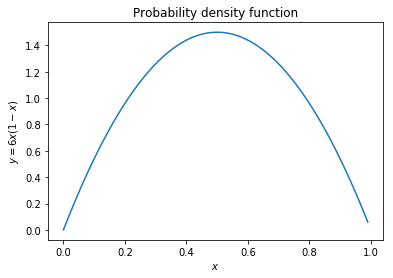

In [8]:

def p(x):
    return 6 * x * (1 - x)

dx = 0.01
x = np.arange(0, 1, dx)
plt.plot(x, p(x))
plt.xlabel('$x$')
plt.ylabel('$y = 6x(1 - x)$')
plt.title('Probability density function');

In [9]:

integral = np.sum(p(x) * dx)
print('Approximated integral = {}'.format(integral))

Approximated integral = 0.9999



**3b) ** Derive the exact integral using calculus. 



Solution: $\int_0^1 6x(1-x) dx = 6 \int_0^1(x - x^2) dx = 6([\frac{1}{2} x^2]_0^1 - [\frac{1}{3} x^3]_0^1 = 6(\frac{1}{2} - \frac{1}{3}) = 1$

**3c) ** Does this function satisfy Equation 4.3?




Solution: yes

**3d)** From inspecting the graph, what is the maximal value of p(x) and for what x does it occur?

Solution: p(x) = 1.5 when x = 0.5

---
### 4) Marginal and conditional densities II (Continuous distributions and numerical integration)

Load the file `pdfData2D.mat`, which contains a discretely sampled 2D probability density. The variables defined include: 

$\quad$ `x` = a vector of $x$ points

$\quad$ `y` = a vector of $y$ points

$\quad$ `Pxy` = a 2D matrix, whose $(i, j)$ 'th entry is the probability $p(x = {\tt x[j]}, y = {\tt y[i]})$ 

*Note:* This isn't really "continuous", is it? When we work with continuous densities, it is common to discretely sample them in a grid. While this problem looks harder than the previous problem, all of the same methods apply! The *only* difference is that instead of three values of $x$ and $y$, we now have 200 and 250 values, respectively.
 
*Another Note:* `np.sum(Pxy) * dx * dy = 1`, where `dx = x[2] - x[1] = .1 = dy`.  Here is a block of code to get you started and help you visualize $p(x,y)$: (use this as a reference when you'll need to make your own 2D plots below)





sum(Pxy)*dx*dy is equal to 0.9999999999999996


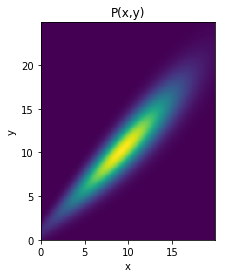

In [18]:
# Read in the variables from pdfData2D.mat
from scipy.io import loadmat
data = loadmat('pdfData2D.mat')
x = data['x']
y = data['y']
Pxy = data['Pxy']

# Plot using imshow and label axes
plt.figure()
plt.imshow(Pxy, origin='lower', interpolation='none', 
           extent=(x[0,0],x[-1,0],y[0,0],y[-1,0]), aspect='equal',
           cmap='viridis')
plt.title('P(x,y)')
plt.xlabel('x')
plt.ylabel('y')

# Verify: sum(Pxy(:))*dx*dy = 1, where dx = x(2)-x(1) = .1 = dy
dx = 0.1
dy = 0.1
sum_pxy = np.sum(np.sum(Pxy))
print('sum(Pxy)*dx*dy is equal to', sum_pxy*dx*dy)

**4a)** From this joint two-dimensional density, compute and make plots (or images) of

- $P(x)$ : the marginal distribution over x

- $P(y)$ : the marginal distribution over y

- $P(y\,|\,x=5)$ : the conditional over $y$ given $x=5$

- $P(x\,|\,y)$ : the full image of the conditional density $P(x\,|\,y)$

Text(0,0.5,'y')

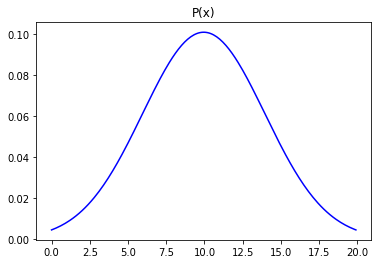

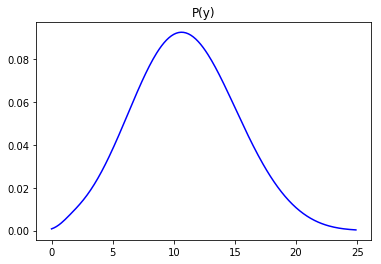

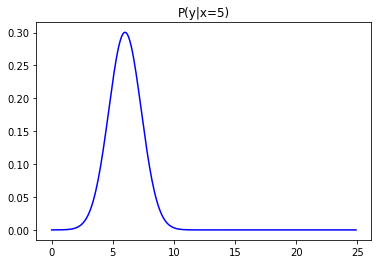

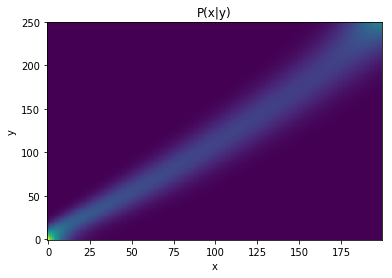

In [20]:
# P(x) - the marginal distribution over x
Px = np.sum(Pxy,axis=0)*dy
Px = np.reshape(Px,(-1,1))
plt.figure()
plt.plot(x,Px,'b-')
plt.title('P(x)')

# P(y) - the marginal distribution over y
Py = np.sum(Pxy,axis=1)*dx
Py = np.reshape(Py,(-1,1))
plt.figure()
plt.plot(y,Py,'b-')
plt.title('P(y)')

# P(y|x=5) : the conditional over y given x=5
index_x5 = np.where(np.isclose(x,5,1e-8))
index_x5 = index_x5[0]
Py_x5 = Pxy[:,index_x5]
Py_x5 = Py_x5/(np.sum(Py_x5)*dy)
plt.figure()
plt.plot(y,Py_x5,'b-')
plt.title('P(y|x=5)')

# P(x|y) - the full image of the conditional density P(x|y)
Px_y = Pxy / Py
plt.figure()
plt.imshow(Px_y, aspect='auto', origin='lower', cmap='viridis')
plt.title('P(x|y)')
plt.xlabel('x')
plt.ylabel('y')



**4b)**  Three common statistics one might wish to compute from a density are its mean, mode, and median.  

- The *mean* is the average value, given by $\mathbb{E}[x] = \int x P(x) dx$ when $P(x)$ is a pdf, and $\mathbb{E}[x] = \sum_{i} x_i P(x_i)$ when $P(x)$ is a pmf.

- The *mode* is the value $x$ where $P(x)$ takes its maximum. We
  can write this (fancily, if we like) as $\arg\max_x P(x)$. 

- The *median* is the value of $x$ where half the probability
  mass $P(x)$ is to the left (smaller than $t$) and half the
  probability is to the right (greater than $t$). In math notation,
  this corresponds to saying that the mode $t$ satisfies 
  
  Compute the mean, mode and median of the marginal $P(x)$ and of the conditional $P(x|y=3)$. 


The mean of Px is  9.949999999999992
The mode of Px is  10.000000000000002
The median of Px is  9.9
The mean of P(x|y=3) is  2.8178986241417108
The mode of P(x|y=3) is  2.4000000000000004
The median of P(x|y=3) is  2.6


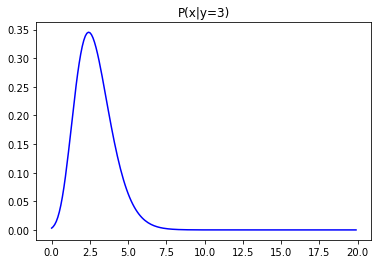

In [24]:
# mean of P(x)
Px_mean = x.T.dot(Px)*dx
Px_mean = Px_mean[0][0]
print('The mean of Px is ', Px_mean)

# mode of P(x)
Px_mode = x[np.argmax(Px)]
Px_mode = Px_mode[0]
print('The mode of Px is ', Px_mode)

# median of P(x)
Px_cumsum = np.cumsum(Px)*dx
diff = np.abs(Px_cumsum-0.5)
diff_arg = np.argsort(diff)
index_median = diff_arg[0]
Px_median = x[index_median]
Px_median = Px_median[0]
print('The median of Px is ', Px_median)


# get P(x|y=3)
index_y3 = np.where(np.isclose(y,3,1e-8))
index_y3 = index_y3[0]
Px_y3 = Pxy[index_y3,:].T
Px_y3 = Px_y3/np.sum(Px_y3)/dx
plt.figure()
plt.plot(x,Px_y3,'b-')
plt.title('P(x|y=3)')

# mean of P(x|y=3)
Px_y3_mean = x.T.dot(Px_y3)*dx
Px_y3_mean = Px_y3_mean[0][0]
print('The mean of P(x|y=3) is ', Px_y3_mean)

# mode of P(x|y=3)
Px_y3_mode = x[np.argmax(Px_y3)]
Px_y3_mode = Px_y3_mode[0]
print('The mode of P(x|y=3) is ', Px_y3_mode)

# median of P(x|y=3)
Px_y3_cumsum = np.cumsum(Px_y3)*dx
diff = np.abs(Px_y3_cumsum-0.5)
diff_arg = np.argsort(diff)
index_median = diff_arg[0]
Px_y3_median = x[index_median]
Px_y3_median = Px_y3_median[0]
print('The median of P(x|y=3) is ', Px_y3_median)
